In [1]:
%run distributions.ipynb

# FBP

fare stessa distribuzione, MA intervalli diversi, magari uguali magari disgiunti (il FBP impara molto velocemente, magari fa meglio di radice di T). trovare punti in cui è possibile fare conti a mano)

overleaf parte teoria
git parte pratica

plottare regret e pseudo regret(valore atteso)

Supponiamo che 
$(S,B), (S_1, B_1), (S_2, B_2),...$
sia un processo di coppie di variabili aleatorie indipendenti e identicamente distribuite. Allora: 

$$
\sum_{t=1}^T GFT(p, s_t, b_t)
$$

$$
\begin{align*}
R(\alpha) = \left[ \sum_{t=1}^{T} GFT(p, S, B) - \sum_{t=1}^{T} GFT(p_t, S_t, B_t) \right]\\
= \sum_{t=1}^{T} \left[ GFT(p, S, B) - \sum_{t=1}^{T} GFT(p_t, S_t, B_t) \right]\\
= T \left[ GFT(p, S, B) - \sum_{t=1}^{T} GFT(p_t, S_t, B_t) \right] \\
\leq c \cdot \sqrt{T}
\end{align*}
$$

Per cui, per calcolarti $R_T(\alpha)$, possiamo dapprima calcolarci (a mano, se i conti ci sono amici, o computazionalmente, se ci sono nemici) la quantità:
$\mathbb E\left[ GFT(p, S, B) \right] p \in [0,1]$
e poi lanciare il processo stocastico e calcolarci: 

 
$\sum_{t=1}^{T} {GFT(p_t, S_t, B_t)}$

## Distribuzione Uniforme

Se 𝑆 e 𝐵 sono tra loro indipendenti ed entrambi con distribuzione uniforme, allora: 

$
\begin{align*}
& \forall p \in [0,1], E [ GFT(p, S, B) ] = \\
& = E [ (B-S) \cdot I \{ S \leq p \leq B \} ]\\
& = \int \int (b-s) \cdot \{ s \leq p \leq b \} \cdot P_{(S,B)} (s,b) \, ds \, db  \\
& = \int \int (b-s) \cdot \{ s \leq p \leq b \} \, ds \, db
\end{align*}
$


Dunque, dobbiamo calcolarci questo integrale doppio e poi trovare quel 𝑝 ∈ [0,1] che lo massimizza. 



\begin{align*}
\mathbb E[(b-s)I\{s\leq p\leq b\}] & = \int_0^1 \int_0^1 (b-s) \mathbb I\{s\leq p\leq b\} \, ds \, db \\
& = \int_0^1 \int_0^p (b-s) \mathbb I\{s \leq p\} \, ds \, db \\
& = \int_p^1 \int_0^p (b-s) \, ds \, db \\
& = \int_p^1 \int_0^p b ds - \int_0^p s ds \\
& = \int_p^1 b\cdot \int_0^p ds - \int_0^p s ds \\
& = \int_p^1 b\cdot (p - \frac{p^2}{2}) db\\
& = p \int_p^1 b db - \frac{p^2}{2} \int_p^1 db \\
& = p (\frac{1}{2} - \frac{p^2}{2}) - \frac{p^2}{2} (1-p)  \\
& = \frac{p}{2} - \frac{p^3}{2} - \frac{p^2}{2} + p^3/2 \\
& = \frac{p}{2} - \frac{p^2}{2} \\
& = \frac{p}{2}(1-p)
\end{align*}


\begin{align*}
\frac{p}{2}(1-p):\begin{cases}
p=0, p=1 \rightarrow v=0 \\
p=\frac{1}{2} \rightarrow v=\frac{1}{8}
\end{cases}
\end{align*}


\begin{align*}
\max_{p\in[0,1]} \rightarrow \frac{1}{8} \\
T^* \max_{p\in[0,1]} = \frac{T}{8}
\end{align*}


## Distribuzione Beta

https://www.stat.rice.edu/~dobelman/textfiles/DistributionsHandbook.pdf

https://people.dmi.unipr.it/alessandro.zaccagnini/psfiles/lezioni/dott2006.pdf

Se $S$ e $B$ fossero distribuite secondo una distribuzione beta, dobbiamo adattare il calcolo del valore atteso di $T \cdot \mathbb {E}[GFT(p, S, B)]$ in base alla nuova distribuzione.

La distribuzione beta è caratterizzata dai parametri $\alpha$ e $\beta$, che rappresentano la forma della distribuzione.

In generale, per una distribuzione beta con parametri $\alpha$ e $\beta$, la funzione di densità è data da:

$$[f(x; \alpha, \beta) = \frac{x^{\alpha-1} \cdot (1 - x)^{\beta-1}}{B(\alpha, \beta)}]$$

Dove ${B(\alpha, \beta)}$ è la funzione beta (di Eulero), utilizzata come fattore di normalizzazione per rendere l'integrale della funzione di densità pari a 1, pari a:

$$
B(\alpha, \beta) = \int_{0}^{1} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt
$$

Se $S$ e $B$ sono distribuite secondo una distribuzione beta con parametri $\alpha_S$ e $\beta_S$ e $\alpha_B$ e $\beta_B$ rispettivamente, possiamo scrivere la funzione di densità di $S$ come $f_S(s) = \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)}$ e la funzione di densità di $B$ come $f_B(b) = \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)}$.

Il valore atteso di $GFT(p, S, B)$ rispetto alle distribuzioni di $S$ e $B$ è quindi dato dall'integrale doppio:


$
\begin{align*}
\mathbb{E}[GFT(p, S, B)] &= \int_{0}^{1} \int_{0}^{1} (b - s) \cdot \mathbb I \{s \leq p \leq b\} \cdot f_S(s) \cdot f_B(b) \, ds \, db \\
&= \int_{0}^{1} \int_{0}^{1} (b - s) \cdot \mathbb I \{s \leq p \leq b\} \cdot \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)} \cdot \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)} \, ds \, db \\
&= \int_{p}^{1} \int_{0}^{p} (b - s) \cdot \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)} \cdot \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)} \, db \, ds \\
\end{align*}
$


In [3]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import dblquad

"""
  Calcola il valore atteso di una funzione integranda basata su distribuzioni beta.

  La funzione integranda viene calcolata in base ai parametri delle distribuzioni beta 
  del seller (S) e del buyer (B).

  Args:
      alpha_S: parametro alpha della distribuzione beta di vendita.
      beta_S: parametro beta della distribuzione beta di vendita.
      alpha_B: parametro alpha della distribuzione beta di acquisto.
      beta_B: parametro beta della distribuzione beta di acquisto.
      p: probabilità di acquisto.
      T: orizzonte temporale.

  Returns:
      Valore atteso moltiplicato per T.
  """

def expected_value_beta(alpha_S, beta_S, alpha_B, beta_B, p, T):
  
  # Funzione integranda in un punto (b,s)
    """
    Args:
        b: valore di acquisto casuale.
        s: valore di vendita casuale.
        alpha_S: parametro alpha della distribuzione beta di vendita.
        beta_S: parametro beta della distribuzione beta di vendita.
        alpha_B: parametro alpha della distribuzione beta di acquisto.
        beta_B: parametro beta della distribuzione beta di acquisto.

    Returns:
        Prodotto di (b - s) per le densità di probabilità beta di s e b.
    """
    def integrand(b, s, alpha_S, beta_S, alpha_B, beta_B):
        return (b - s) * beta.pdf(s, alpha_S, beta_S) * beta.pdf(b, alpha_B, beta_B)

  # Calcola il valore atteso
    """
    Utilizza la funzione dblquad per calcolare la doppia integrazione della funzione integranda.

    Args:
        p: probabilità di acquisto.
        alpha_S: parametro alpha della distribuzione beta di vendita.
        beta_S: parametro beta della distribuzione beta di vendita.
        alpha_B: parametro alpha della distribuzione beta di acquisto.
        beta_B: parametro beta della distribuzione beta di acquisto.

    Returns:
        Valore atteso.
    """
    def calculate_expected_value(p, alpha_S, beta_S, alpha_B, beta_B):
   
    # Limiti di integrazione
        outer_lower_limit = p  # Limite inferiore dell'integrale interno
        outer_upper_limit = 1  # Limite superiore dell'integrale interno

        inner_lower_limit = 0  # Limite inferiore dell'integrale esterno
        inner_upper_limit = p  # Limite superiore dell'integrale esterno

    # Argomenti per la funzione integranda
        args_integrand = (alpha_S, beta_S, alpha_B, beta_B)

    # Calcola la doppia integrazione con dblquad
        result, _ = dblquad(integrand, outer_lower_limit, outer_upper_limit, inner_lower_limit, inner_upper_limit, args=args_integrand)

    # Ottieni il valore atteso
        expected_value = result

    # Restituisci il valore atteso moltiplicato per T
        return expected_value * T

  # Calcola il valore atteso
    expected_value = calculate_expected_value(p, alpha_S, beta_S, alpha_B, beta_B)

  # Restituisci il valore atteso già moltiplicato per T
    return expected_value

In [4]:
# Genera parametri casuali
alpha_S_random = round(np.random.uniform(low=0, high=10),2)
beta_S_random = round(np.random.uniform(low=0, high=10),2)
alpha_B_random = round(np.random.uniform(low=0, high=10),2)
beta_B_random = round(np.random.uniform(low=0, high=10),2)
p_random = np.random.uniform(low=0, high=1)
T = 300

# Calcola il valore atteso con parametri casuali
expected_value = expected_value_beta(alpha_S_random, beta_S_random ,alpha_B_random, beta_B_random, p_random ,T)
print(f"alpha_S: {alpha_S_random,beta_S_random}, alpha_B: {alpha_B_random,beta_B_random}")
print("p: ", p_random)
print("Valore atteso: ", expected_value)

#fare griglia di punti di p per torvare migliore di tutti
#oppure fare E[S] quando stessa distribuzione -> alpha_s = alpha_b

#disegna la funzione di densità per il seller e il buyer
draw_pdf_beta(alpha_S_random, beta_S_random, alpha_B_random, beta_B_random, T)

alpha_S: (1.41, 1.3), alpha_B: (0.95, 7.36)
p:  0.6314916784485565
Valore atteso:  -76.33865270750462


NameError: name 'draw_pdf_beta' is not defined

In [ ]:
# dict_weight_intervals_seller rappresenta il dizionario contenente peso_intervallo, (inizio-fine) del seller
# dict_weight_intervals_buyer rappresenta il dizionario contenente peso_intervallo, (inizio-fine) del buyer

def expected_value_discrete_uniform(T, p, S, B, dict_weight_intervals_seller, dict_weight_intervals_buyer):
    expected_regret = 0
    
    # dato un elemento restituiamo la probabilità che questo esca
    # ovvero il peso del suo intervallo
    
    def prob_element_in_interval(dictionary, el):
        for key, value in dictionary.items():
            # controllo se il valore appartiene all'intervallo corrente
            if  el <= value:
                return key
    
    for t in range(T):
        expected_regret += ((B[t] - S[t]) * (1 if S[t] <= p <= B[t] else 0)) \
        * prob_element_in_interval(dict_weight_intervals_seller, S[t]) \
        * prob_element_in_interval(dict_weight_intervals_buyer, B[t])
                           
    expected_regret = expected_regret * T
    #restituiamo il valore ottenuto
    return expected_regret


In [ ]:
T = 300
p = np.random.uniform(low=0, high=1)
num_cifre = 3

S_D_tmp, S_num_of_els_in_intervals, interval_list_s  = generate_random_weighted_distribution(T, num_cifre)
B_D_tmp, B_num_of_els_in_intervals, interval_list_b  = generate_random_weighted_distribution(T, num_cifre)

S_D = np.concatenate(S_D_tmp).tolist()
B_D = np.concatenate(B_D_tmp).tolist()

dict_weight_intervals_seller = dict(zip(S_num_of_els_in_intervals, interval_list_s))
dict_weight_intervals_buyer = dict(zip(B_num_of_els_in_intervals, interval_list_b))

expected_value = expected_value_discrete_uniform(T, p, S_D, B_D, dict_weight_intervals_seller, dict_weight_intervals_buyer)

print("Dizionario peso-intervallo del Seller: ",dict_weight_intervals_seller)
print("Dizionario peso-intervallo del Buyer: ",dict_weight_intervals_buyer)

print("Valore atteso: ", expected_value)
draw_weighted_distribution(S_D,B_D,interval_list_s,interval_list_b)

## Distribuzione  D± $\epsilon$

Distribuzione del seller: $f_{S, \pm\epsilon} = 2(1\pm\epsilon) * \mathbb I[0, \frac{1}{4}] + 2(1\mp\epsilon) * \mathbb I[\frac{1}{2}, \frac{3}{4}]$

L'intervallo su cui la funzione indicatrice verifica la condizione è $0 \leq s \leq \frac{1}{4}$ e $\frac{1}{2} \leq s \leq \frac{3}{4} $

Distribuzione del buyer: $f_{B} = 2 * (I[\frac{1}{4}, \frac{1}{2}] \cup \mathbb I[\frac{3}{4}, 1])$

L'intervallo su cui la funzione indicatrice verifica la condizione è $ \frac{1}{4} \leq b \leq \frac{1}{2} $ (cioè per i valori di $ b $ nell'intervallo $ [\frac{1}{4}, \frac{1}{2}] $ ).


\begin{align*}
\mathbb E[(b-s)I\{s\leq p\leq b\}] &=\int_0^1 \int_0^1 (b-s) \mathbb I\{s\leq p\leq b\} \cdot f_S(s) \cdot f_B(b) \, ds \, db \\
&=\int_p^1 \int_0^p (b-s)\cdot f_S(s) \cdot f_B(b) \, ds \, db \\
&= \int_p^1 \int_0^p (b-s) \cdot \left( 2(1\pm\epsilon) \cdot I[0, \frac{1}{4}] + 2(1\mp\epsilon) \cdot I[\frac{1}{2}, \frac{3}{4}] \right) \cdot 2 \cdot \left( I[\frac{1}{4}, \frac{1}{2}] + I[\frac{3}{4}, 1] \right) \, ds \, db \\
&= \int_p^1 \int_0^p (b-s) \cdot 4 \cdot \left( (1\pm\epsilon) \cdot I[0, \frac{1}{4}] +(1\mp\epsilon) \cdot I[\frac{1}{2}, \frac{3}{4}] )\right)\cdot \left( I[\frac{1}{4}, \frac{1}{2}] + I[\frac{3}{4}, 1] \right) \, ds \, db \\
&= \int_p^1 \int_0^p (b-s) \cdot 4 \cdot \left [ \left ( (1 \pm \epsilon) \cdot I_s[0, \frac{1}{4}] \cdot I_b[\frac{1}{4}, \frac{1}{2}] + (1 \pm \epsilon) \cdot I_s[0, \frac{1}{4}] \cdot I_b[\frac{3}{4}, 1]  \right) \\ + \left ( (1\mp\epsilon) \cdot I_s[\frac{1}{2}, \frac{3}{4}]\cdot I_b[\frac{1}{4}, \frac{1}{2}] + (1\mp\epsilon) \cdot I_s[\frac{1}{2}, \frac{3}{4}]\cdot I_b[\frac{3}{4}, 1]  \right ) \right] \, ds \, db \\
&= 4 \cdot\int_p^1 \int_0^p (b-s) \cdot \left [ \left ( (1 \pm \epsilon) \cdot I_s[0, \frac{1}{4}] \cdot I_b[\frac{1}{4}, \frac{1}{2}] + (1 \pm \epsilon) \cdot I_s[0, \frac{1}{4}] \cdot I_b[\frac{3}{4}, 1]  \right) \\ + \left ( (1\mp\epsilon) \cdot I_s[\frac{1}{2}, \frac{3}{4}]\cdot I_b[\frac{1}{4}, \frac{1}{2}] + (1\mp\epsilon) \cdot I_s[\frac{1}{2}, \frac{3}{4}]\cdot I_b[\frac{3}{4}, 1]  \right ) \right] \, ds \, db 
\end{align*}

epsilon = 1/radice(T)
epsilon = 1/t^(1/3)

In [2]:
import numpy as np
from scipy.integrate import dblquad
from scipy.integrate import nquad

def expected_value_epsilon(p, epsilon):
    # Funzione di densità del seller
    def seller_pdf(s, epsilon):
        if 0 <= s <= 1/4:
            return  (1 + epsilon)
        elif 1/2 <= s <= 3/4:
            return  (1 - epsilon)
        else:
            return 0

    # Funzione di densità del buyer
    def buyer_pdf(b):
        if 1/4 <= b <= 1/2 or 3/4 <= b <= 1:
            return 1
        else:
            return 0

    # Funzione integranda
    def integrand(b, s, epsilon):
        return (b - s) * (seller_pdf(s, epsilon) + buyer_pdf(b))
    
    # Split the integration into manageable ranges to handle discontinuities
    def integrate_over_range():
        options = {'epsabs': 1e-8, 'epsrel': 1e-6, 'limit': 1000}
        results = []
        
        # Define ranges that avoid the discontinuities
        ranges = [
            [[p, 1], [0, 1/4]],
            [[p, 1], [1/4, 1/2]],
            [[p, 1], [1/2, 3/4]],
            [[p, 1], [3/4, p]]
        ]
        
        for r in ranges:
            result, error = nquad(integrand, r, args=(epsilon,), opts=[options, options])
            results.append(result)
        
        return sum(results)
    
    # Calculate and return the result
    result = integrate_over_range()
    return result * 4


Epsilon:  0.2
p:  0.5
Expected value:  0.6875


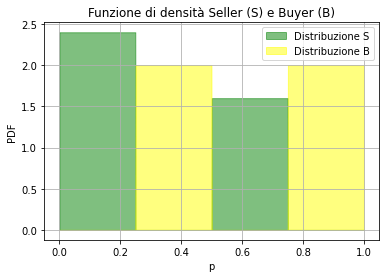

In [7]:
epsilon = 0.2 #np.round(np.random.uniform(low=0, high=1),3)
p = 0.5# np.random.uniform(low=0, high=1)

print("Epsilon: ", epsilon)
print("p: ", p)

expected_value = expected_value_epsilon(p, epsilon)
print("Expected value: ",expected_value)

FBP_epsilon_density_functions(epsilon)

Epsilon:  0.2


/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The maximum number of subdivisions (1000) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  quad_r = quad(f, low, high, args=args, full_output=self.full_output,
/opt/conda/envs/anaconda-2022.05-py39/lib/python3.9/site-packages/scipy/integrate/quadpack.py:879: IntegrationWarning: The 

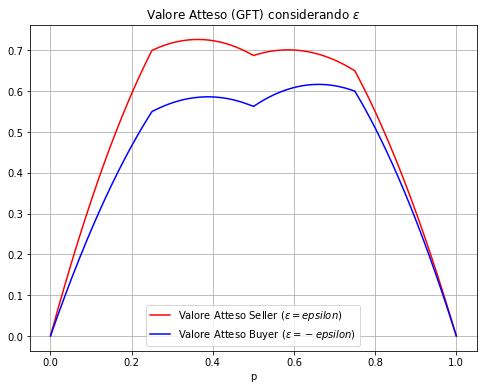

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import dblquad

# range dei valori
p_values = np.linspace(0, 1, 500)

epsilon_values = [epsilon, -epsilon]
print("Epsilon: ",epsilon_values[0])

# calcola il valore atteso in base al valore di epsilon 
expected_values_positive = [expected_value_epsilon(p, epsilon_values[0]) for p in p_values]
expected_values_negative = [expected_value_epsilon(p, epsilon_values[1]) for p in p_values]

# grafico
plt.figure(figsize=(8, 6))

plt.xlabel('p')
plt.title('Valore Atteso (GFT) considerando $\epsilon$')

plt.plot(p_values, expected_values_positive ,  label='Valore Atteso Seller ($\epsilon={epsilon}$)', color='red')
plt.plot(p_values, expected_values_negative, label='Valore Atteso Buyer ($\epsilon=-{epsilon}$)', color='blue')


plt.legend()

plt.grid(True)
plt.show()


`quad(...)`,`dblquad(...)` e `nlquad(...)`: sono le funzioni principali che calcolano il doppio integrale. Prendono come argomenti variabili le funzioni delle coordinate b e s, i limiti di integrazione per ciascuna variabile e i limiti di integrazione per l'integrazione interna.

I valori b e s sono automaticamente creati dalle funzioni:

i valori di b sono presi da p a 1.

i valori di s sono presi da 0 a p


# Scounting Bandits

Ricordiamo che nel modello di feedback realistico, le uniche informazioni raccolte alla fine di ogni round t sono: $\mathbb {I}\lbrace{S_t ≤ P_t}\rbrace$ e  $\mathbb I\lbrace{P_t ≤ B_t}\rbrace$.

## Distribuzione Uniforme

$$
\begin{align*}
\mathbb E[GFT(q_k, S, B)] \sim &P(S \leq q_k)\cdot \hat{F}_k + P(q_k \leq B) \cdot \hat{G}_k \\
&= \mathbb {E}[\mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k | H]\\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH \\
\end{align*}
$$

Dove H rappresenta le stime di $\hat{F}_j, \hat{G}_j$ per ogni j alla fine della fase di esplorazione globale.

Possiamo quindi scrivere l'integrale come somma di integrali:

$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH 
\end{align*}
$$

Sostituiamo i valori $\hat{F}_k$ e di $\hat{G}_k$ con gli integrali $\int_0^1 f(s)d_s$ e $\int_0^1 f(b)d_b$ ottenuti dall'equazione:

$
[\mathbb{E}\left[GFT(p, S, B)\right] = P[S \leq p]\cdot P[p \leq B] + P[p \leq B]\cdot P[S \leq p]
$

Sapendo che S e B sono distribuzioni uniformi in [0,1] e indipendenti possiamo scrivere che:


$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH  \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \int_0^1 f(s) d_s \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \int_0^1 f(b) d_b \rbrace \cdot dH 
\end{align*}
$$

Possiamo quindi scrivere che le loro funzioni di densità sono:

* f(s) = 1 per $s \in [0,1]$
* f(g) = 1 per $s \in [0,1]$

e quindi:

* $\hat{F}_k = \int_0^{1}f(s)d_s = \int_0^{q_k}f(s)d_s =  \int_0^{q_k} 1 = q_k$
* $\hat{G}_k = \int_{0}^{1}f(g)d_g = \int_{q_k}^{1}f(g)d_g =  \int_{q_k}^1 1 = 1-q_k$

Sostituiamo ottenendo che:


$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \int_0^1 f(s) d_s \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \int_0^1 f(b) d_b \rbrace \cdot dH \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot q_k \rbrace \cdot dH + 
\int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot (1-q_k) \rbrace \cdot dH \\
\end{align*}
$$

A questo punto sapendo che S e B sono uniformemente distribuiti su [0,1] possiamo scrivere che:

* $P(S \leq q_k) = q_k$
* $P(q_k \leq B) = 1 - q_k$

Quindi sostituendo all'integrale otteniamo che:

$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot q_k \rbrace \cdot dH + 
\int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot (1-q_k) \rbrace \cdot dH \\
&= q_k \cdot q_k + (1-q_k) \cdot (1-q_k) \\
&= q_k^2 + (1-q_k)^2 \\
\end{align*}
$$

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

def equation(q_k):
    return q_k**2 + (1-q_k)**2

def plot_equation(q_k):
    y = equation(q_k)
    q_k_vals = np.linspace(0, 1, 500)
    y_vals = equation(q_k_vals)
    
    plt.figure(figsize=(10, 6))
    plt.plot(q_k_vals, y_vals, label=r'$y = q_k^2 + (1-q_k)^2$')
    plt.scatter([q_k], [y], color='red', zorder=5)
    plt.title(r'Grafico di $y = q_k^2 + (1-q_k)^2$')
    plt.xlabel('$q_k$')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    plt.ylim(0, 1)
    plt.show()

# Widget interattivo per modificare il valore di q_k
interact(plot_equation, q_k=FloatSlider(min=0, max=1, step=0.01, value=0.5))


interactive(children=(FloatSlider(value=0.5, description='q_k', max=1.0, step=0.01), Output()), _dom_classes=(…

<function __main__.plot_equation(q_k)>

### Distribuzione Beta

$$
\begin{align*}
\mathbb E[GFT(q_k, S, B)] \sim &P(S \leq q_k)\cdot \hat{F}_k + P(q_k \leq B) \cdot \hat{G}_k \\
&= \mathbb {E}[\mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k | H]\\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH \\
\end{align*}
$$

Dove H rappresenta le stime di $\hat{F}_j, \hat{G}_j$ per ogni j alla fine della fase di esplorazione globale.

Possiamo quindi scrivere l'integrale come somma di integrali:

$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k + \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH 
\end{align*}
$$

Sostituiamo i valori $\hat{F}_k$ e di $\hat{G}_k$ con gli integrali $\int_0^1 f(s)d_s$ e $\int_0^1 f(b)d_b$ ottenuti dall'equazione:

$
[\mathbb{E}\left[GFT(p, S, B)\right] = P[S \leq p]\cdot P[p \leq B] + P[p \leq B]\cdot P[S \leq p]
$


Sapendo che S e B sono distribuzioni beta in [0,1] e indipendenti possiamo scrivere che:


$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \hat{F}_k \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \hat{G}_k \rbrace \cdot dH  \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \int_0^1 f(s) d_s \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \int_0^1 f(b) d_b \rbrace \cdot dH 
\end{align*}
$$

Possiamo quindi scrivere che le funzioni di densità sono:

$$[f(x; \alpha, \beta) = \frac{x^{\alpha-1} \cdot (1 - x)^{\beta-1}}{B(\alpha, \beta)}]$$

Dove ${B(\alpha, \beta)}$ è la funzione beta (di Eulero), utilizzata come fattore di normalizzazione per rendere l'integrale della funzione di densità pari a 1, pari a:

$$
B(\alpha, \beta) = \int_{0}^{1} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt
$$

Se $S$ e $B$ sono distribuite secondo una distribuzione beta con parametri $\alpha_S$ e $\beta_S$ e $\alpha_B$ e $\beta_B$ rispettivamente, possiamo scrivere la funzione di densità di $S$ come $f_S(s) = \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)}$ e la funzione di densità di $B$ come $f_B(b) = \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)}$.

e quindi:

* $\hat{F}_k = \int_0^{1} f(s) \,ds = \int_0^{q_k} f(s) \,ds = \int_0^{q_k} {\frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)}}$
* $\hat{G}_k = \int_0^{1} f(g) \,dg = \int_{q_k}^{1} f(g) \,dg = \int_{q_k}^1 \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)}$


Sostituiamo ottenendo che:


$$
\begin{align*}
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \int_0^1 f(s) d_s \rbrace \cdot dH  + \int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \int_0^1 f(b) d_b \rbrace \cdot dH \\
&= \int_0^1 \lbrace \mathbb {I} \lbrace S \leq q_k \rbrace \cdot \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)} \rbrace \cdot dH + 
\int_0^1 \lbrace \mathbb {I} \lbrace q_k \leq B \rbrace \cdot \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)} \rbrace \cdot dH \\
\end{align*}
$$


In [10]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import quad

  #Calcola il valore atteso di una funzione integranda basata su distribuzioni beta.

  #La funzione integranda viene calcolata in base ai parametri delle distribuzioni beta 
  #del seller (S) e del buyer (B).

  #Args:
   #   alpha_S: parametro alpha della distribuzione beta di vendita.
    #  beta_S: parametro beta della distribuzione beta di vendita.
     # alpha_B: parametro alpha della distribuzione beta di acquisto.
      # beta_B: parametro beta della distribuzione beta di acquisto.
      # p: probabilità di acquisto.

  #Returns:
    #Valore atteso

def expected_value_beta(alpha_S, beta_S, alpha_B, beta_B, q_k):
  
  # Funzione integranda di S

    #Args:
        #s: valore di vendita casuale.
        #q_k: valore del prezzo q_k
        #alpha_S: parametro alpha della distribuzione beta di vendita.
        #beta_S: parametro beta della distribuzione beta di vendita.

    #Returns:
      #valore dell'integrale in [0,1]  

    def integrand_s(s, q_k, alpha_S, beta_S):
        return beta.pdf(s, alpha_S, beta_S) if s <= q_k else 0 #funzione indicatrice


    #Args:
        #s: valore di vendita casuale.
        #q_k: valore del prezzo q_k
        #alpha_B: parametro alpha della distribuzione beta di acquisto.
        #beta_B: parametro beta della distribuzione beta di acquisto.
    #Returns:
      #valore dell'integrale in [0,1]  

    def integrand_b(b, q_k, alpha_B, beta_B):
        return beta.pdf(b, alpha_B, beta_B) if q_k <= b else 0 #funzione indicatrice


  # Calcola il valore atteso

        #Utilizza la funzione dblquad per calcolare la doppia integrazione della funzione integranda.

    #Args:
       # q_k: probabilità di acquisto.
        # alpha_S: parametro alpha della distribuzione beta di vendita.
        # beta_S: parametro beta della distribuzione beta di vendita.
        # alpha_B: parametro alpha della distribuzione beta di acquisto.
        # beta_B: parametro beta della distribuzione beta di acquisto.

    # Returns:
        #Valore atteso.
    def calculate_expected_value(q_k,alpha_S, beta_S, alpha_B, beta_B):
   
    # Limiti di integrazione
        lower_limit = 0  # Limite inferiore dell'integrale interno
        upper_limit = 1  # Limite superiore dell'integrale interno

    # Argomenti per la funzione integranda di S
        args_integrand_s = (q_k,alpha_S, beta_S)

    # Argomenti per la funzione integranda di B
        args_integrand_b = (q_k,alpha_B, beta_B)

    # Calcola l'integrale di S
        result_s, _ = quad(integrand_s, lower_limit, upper_limit, args=args_integrand_s)

    # Calcola l'integrale di S
        result_b, _ = quad(integrand_b, lower_limit, upper_limit, args=args_integrand_b)
        
    # Ottieni il valore atteso
        expected_value_s = result_s
        expected_value_b = result_b

    # Restituisci il valore atteso 
        return expected_value_s + expected_value_b

  # Calcola il valore atteso
    expected_value = calculate_expected_value(q_k, alpha_S, beta_S, alpha_B, beta_B)

  # Restituisci il valore atteso già moltiplicato per T
    return expected_value

alpha_S: (4.8, 8.44), alpha_B: (2.99, 4.26)
q_k:  0.5
Valore atteso:  1.1589032993864965


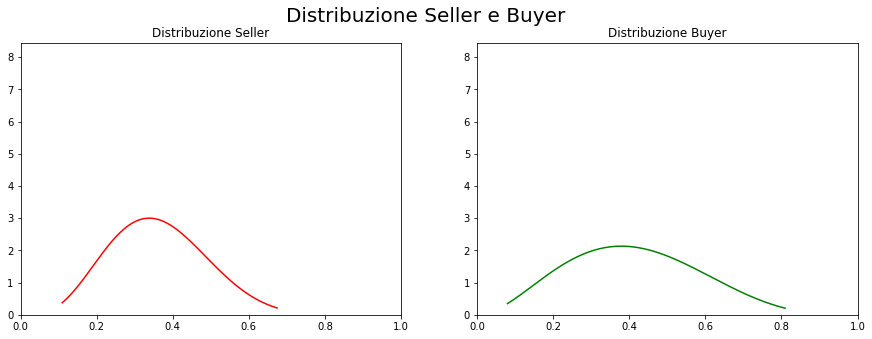

In [11]:
# Genera parametri casuali
alpha_S_random = round(np.random.uniform(low=0, high=10),2)
beta_S_random = round(np.random.uniform(low=0, high=10),2)
alpha_B_random = round(np.random.uniform(low=0, high=10),2)
beta_B_random = round(np.random.uniform(low=0, high=10),2)
T = 2000
q_k = 0.5

# Calcola il valore atteso con parametri casuali
expected_value = expected_value_beta(alpha_S_random, beta_S_random ,alpha_B_random, beta_B_random,q_k)
print(f"alpha_S: {alpha_S_random,beta_S_random}, alpha_B: {alpha_B_random,beta_B_random}")
print("q_k: ", q_k)
print("Valore atteso: ", expected_value)

#disegna la funzione di densità per il seller e il buyer
draw_pdf_beta(alpha_S_random, beta_S_random, alpha_B_random, beta_B_random, T)

## Distribuzione  D± $\epsilon$

Creiamo una famiglia di distribuzioni $D_{\pm\varepsilon}$ sia per il buyer che per il seller parametrizzata su $\varepsilon \in$[0,1].

Definiamo per il seller una funzione di densità dipendente dal valore di epsilon tale che:

$
f_{S,\pm\varepsilon} := \frac{1}{4\theta} \cdot \left( (1 \pm \varepsilon)\cdot I_{[0,\theta]} + (1 \mp \varepsilon)I_{[\frac{1}{6},\frac{1}{6}+\theta]} + I_{[\frac{1}{4},\frac{1}{4}+\theta]} + I_{[\frac{2}{3},\frac{2}{3}+\theta]} \right)
$

Dove $\vartheta = \frac{1}{48}$ è una costante di normalizazzione

Definiamo per il buyer una funzione di densità dipendente tale che:

$
f_{B} := \frac{1}{4\theta} \left( I_{[\frac{1}{3}-\theta],\frac{1}{3}} + I_{[\frac{3}{4}-\theta],\frac{3}{4}} + I_{[\frac{5}{6}-\theta],\frac{5}{6}} + I_{[1-\theta],1} \right)
$

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Funzione densità del seller dipendente da epsilon
def seller_pdf(s, epsilon, theta):
    value = np.zeros_like(s, dtype=float)
    value += np.where((1/4 <= s) & (s <= (1/4 + theta)), 1, 0)
    value += np.where((2/3 <= s) & (s <= (2/3 + theta)), 1, 0)
    value += np.where((0 <= s) & (s <= theta), 1 + epsilon, 0)
    value += np.where((1/6 <= s) & (s <= (1/6 + theta)), 1 - epsilon, 0)
    
    return value * (1 / (4 * theta))

# Funzione densità del buyer indipendente da epsilon
def buyer_pdf(b, theta):
    value = np.zeros_like(b, dtype=float)
    value += np.where((1/3 - theta <= b) & (b <= 1/3), 1, 0)
    value += np.where((3/4 - theta <= b) & (b <= 3/4), 1, 0)
    value += np.where((5/6 - theta <= b) & (b <= 5/6), 1, 0)
    value += np.where((1 - theta <= b) & (b <= 1), 1, 0)
    
    return value * (1 / (4 * theta))


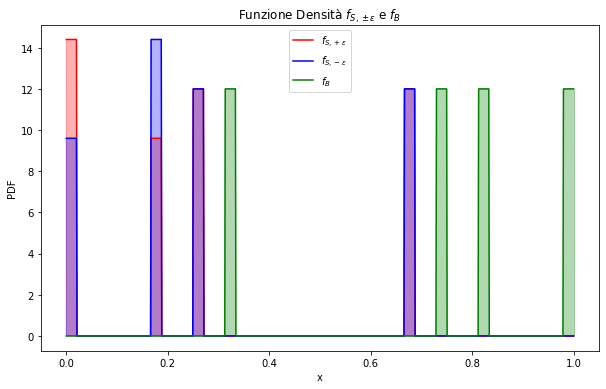

In [13]:
# Crea valori x
x = np.linspace(0, 1, 1000)
theta = 1/48

# Calcola valori
y_seller_pos = seller_pdf(x, epsilon, theta)
y_seller_neg = seller_pdf(x, -epsilon, theta)
y_buyer = buyer_pdf(x, theta)

# Disegniamo Grafico
plt.figure(figsize=(10, 6))

plt.plot(x, y_seller_pos, 'r', label='$f_{S,+\\varepsilon}$')
plt.plot(x, y_seller_neg, 'b', label='$f_{S,-\\varepsilon}$')
plt.plot(x, y_buyer, 'g', label='$f_{B}$')

# Aggiungiamo Colore per distinguere grafici
plt.fill_between(x, 0, y_seller_pos, where=(y_seller_pos > 0), color='red', alpha=0.3, interpolate=True)
plt.fill_between(x, 0, y_seller_neg, where=(y_seller_neg > 0), color='blue', alpha=0.3, interpolate=True)
plt.fill_between(x, 0, y_buyer, where=(y_buyer > 0), color='green', alpha=0.3, interpolate=True)

plt.xlabel('x')
plt.ylabel('PDF')
plt.title('Funzione Densità $f_{S,\\pm\\varepsilon}$ e $f_{B}$')
plt.legend()

plt.show()


# Scouting Blindits

### DISTRIBUZIONE UNIFORME

Sia la funzione $GFT(p, p', S, B)$ definita come:

$$
GFT(p, p', S, B) = (b - p' + p - s) * \mathbb {I}\lbrace{b ≤ p' ≤ p ≤ s}\rbrace
$$

Possiamo scrivere il valore atteso di $E[GFT(p, p', S, B)]$ considerando S e B come due distribuzioni uniformi come:

$$
\int_{0}^{p'} \left( \int_{p}^{1} (b - p' + p - s) \cdot f_B(b) \, db \right) \,\cdot f_S(s)  \cdot ds
$$

**1. Calcolo dell'integrale interno rispetto a \(b\):**

$$
\int_{p}^{1} (b - p' + p - s) \cdot f_S(s)  \cdot f_B(b) \cdot db
$$

Integrando rispetto a \(b\), otteniamo:

$$
\left[ \frac{b^2}{2} - p'b + pb - sb \right]_{p}^{1} \cdot f_S(s)  = \left( \frac{1}{2} - p' + p - s - \frac{p^2}{2} + p'p - ps \right) \cdot f_S(s) 
$$


**2. Calcolo dell'integrale esterno rispetto a \(s\):**

Ora possiamo calcolare l'integrale esterno rispetto a \(s\):

$$
\int_{0}^{p'} \left( \frac{1}{2} - p' + p - s - \frac{p^2}{2} + p'p - ps \right) \cdot  \, ds
$$

Integrando rispetto a \(s\), otteniamo:

\begin{align*}
\left[ \frac{1}{2}s - p's + ps - \frac{s^2}{2} - \frac{p^2s}{2} + p'ps - \frac{p}{2}s^2 \right]_{0}^{p'} =\\
= \frac{1}{2}p' - p'^2 + pp' - \frac{p'^2}{2} - \frac{p^2p'}{2} + p'^2p - \frac{p}{2}p'^2 = \\
= \frac{1}{2}p' - \frac{3}{2}p'^2 + p'p - \frac{p'p^2}{2} +\frac{p'^2 p}{2} = \\
= \frac{1}{2}p' - \frac{3}{2}p'^2 + p (p' - \frac{p'p}{2} + \frac{p'^2}{2}) \\
\end{align*}

Quindi, l'integrale dato:

$$
\int_{0}^{p'} \left( \int_{p}^{1} (b - p' + p - s) \cdot f_B(b) \, \cdot db \right) \, \cdot f_S(s) \cdot ds
$$

si semplifica a:

$$
\frac{1}{2}p' - \frac{3}{2}p'^2 + p (p' - \frac{p'p}{2} + \frac{p'^2}{2})
$$


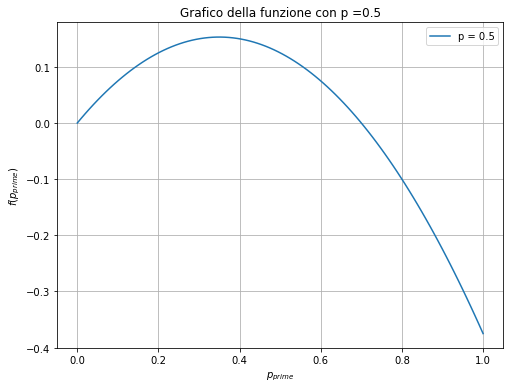

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider

# Definizione della funzione
def f(p, p_prime):
    return 0.5 * p_prime - 1.5 * p_prime**2 + p * (p_prime - 0.5 * p_prime * p + 0.5 * p_prime**2)

# Funzione per tracciare il grafico
    # Generazione di valori di p' da 0 a 1
p_prime_values = np.linspace(0, 1, 100)
    
    # Calcolo dei valori della funzione per il valore fisso di p
f_values = f(p, p_prime_values)

#def plot_function(p):
    # Tracciamento del grafico
plt.figure(figsize=(8, 6))
plt.plot(p_prime_values, f_values, label=f'p = {p}')
plt.xlabel('$p_{prime}$')
plt.ylabel("$f(p_{prime})$")
plt.title('Grafico della funzione con p =' + str(p))
plt.legend()
plt.grid(True)
plt.show()

# Creazione del widget interattivo
#interact(plot_function, p=FloatSlider(value=0.5, min=0, max=1, step=0.01, description='p:'))
#plot_function(0.5)

Ora, se supponiamo che $$p = p'$$

possiamo scrivere:

$$
\frac{1}{2}p - \frac{3}{2}p^2 + p^2  = \frac{p}{2} - \frac{p^2}{2}
$$

Ottenendo lo stesso risultato nel caso di FBP con S e B distribuzioni uniformi i.i.v.

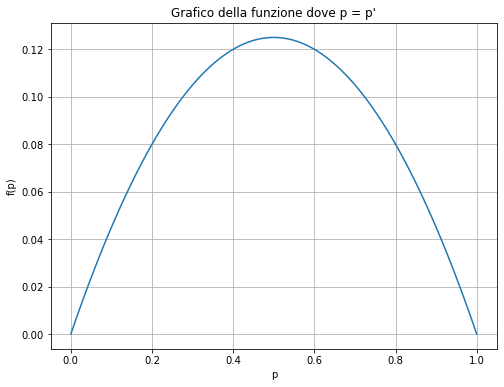

In [15]:
import numpy as np
import matplotlib.pyplot as plt

# Definizione della funzione
def f(p):
    return 0.5 * p - 0.5 * p**2

# Generazione di valori di p da 0 a 1
p_values = np.linspace(0, 1, 100)

# Calcolo dei valori della funzione per il valore fisso di p
f_values = f(p_values)

# Tracciamento del grafico
plt.figure(figsize=(8, 6))
#plt.plot(p_prime_values, f_values, label=f'p = {p_fixed}')
plt.plot(p_prime_values, f_values)
plt.xlabel("p")
plt.ylabel("f(p)")
plt.title("Grafico della funzione dove p = p'")
#plt.legend()
plt.grid(True)
plt.show()


Altrimenti, se $$p \ne p'$$

Allora:

La funzione data è una funzione quadratica in $p'$ (grado: 2), quindi per trovare il massimo possiamo calcolare la derivata rispetto a $p'$ e poi risolvere per il valore di $p'$ in cui la derivata si annulla.

La funzione data è:

$$
f(p', p) = \frac{1}{2}p' - \frac{3}{2}p'^2 + p \left( p' - \frac{p'p}{2} + \frac{p'^2}{2} \right)
$$


**Calcoliamo la derivata rispetto a $p'$:**

$$
\frac{df}{dp'} = \frac{1}{2} - 3p' + p(-\frac{p}{2} + p' + 1)
$$

Uguagliamo la derivata a zero per trovare il massimo:

$$
\frac{1}{2} - 3p' + p(-\frac{p}{2} + p' + 1) = 0
$$

Risolvendo per $p'$, otteniamo:

$$
p' = \frac{\frac{p^2}{2} - p - \frac{1}{2}}{p - 3}
$$


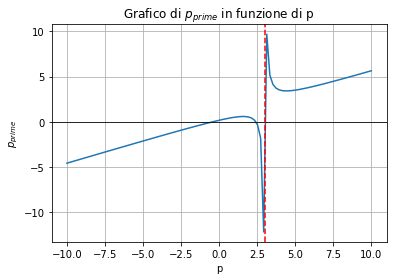

In [16]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(-10, 10, 100)  # Range di valori di p
p_prime = ( 0.5*p**2 - p -0.5) / (p - 3)  # Calcolo di p' per ogni valore di p


plt.plot(p, p_prime)
plt.xlabel('p')
plt.ylabel('$p_{prime}$')
plt.title("Grafico di $p_{prime}$ in funzione di p")
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=0.8)  # Linea orizzontale in y=0
plt.axvline(x=3, color='red', linestyle='--', linewidth=1.5)  # Linea verticale in x=3 (divisore verticale)

plt.show()


Osserviamo i valori $p \in [0,1]$

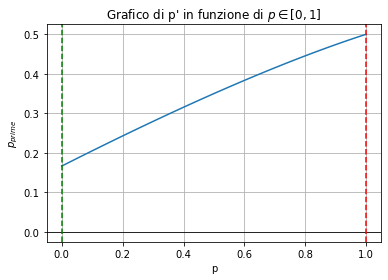

In [17]:
import numpy as np
import matplotlib.pyplot as plt

p = np.linspace(0, 1, 100)  # Range di valori di p tra 0 e 1
p_prime = (-0.5 + 0.5*p**2 - p) / (p - 3)  # Calcolo di p' per ogni valore di p


plt.plot(p, p_prime)
plt.xlabel('p')
plt.ylabel('$p_{prime}$')
plt.title("Grafico di p' in funzione di $p \in [0,1]$")
plt.grid(True)
plt.axhline(y=0, color='black', linewidth=0.8)  # Linea orizzontale in y=0
plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5)  # Linea verticale in x=1 (divisore verticale)
plt.axvline(x=0, color='green', linestyle='--', linewidth=1.5)  # Linea verticale in x=1 (divisore verticale)
plt.show()


In questo caso sembra che il $p$ che massimizza $p'$ sia $p=1$, ottendendo:

$$
p = 1 \rightarrow p' = \frac{1}{2}
$$

**Risolvendo per $p$, otteniamo:**


$$ -\frac{p^2}{2} + (p' - 3) p + \frac{1}{2} = 0 $$

Usando la formula quadratica:
$$ p = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a} $$

Sostituendo i valori di $a$, $b$ e $c$:
$$ p = \frac{-p' + 3 \pm \sqrt{(p' - 3)^2 - 4 \cdot (-\frac{1}{2}) \cdot \frac{1}{2}}}{2 \cdot (-\frac{1}{2})} $$

Continuando a semplificare:
$$ p = \frac{p' - 3 \pm \sqrt{p'^2 - 6p' + 9 + 1}}{-1} $$

Quindi, la soluzione per $p$ è:
$$ p = 3 \pm \sqrt{p'^2 - 6p' + 10} $$

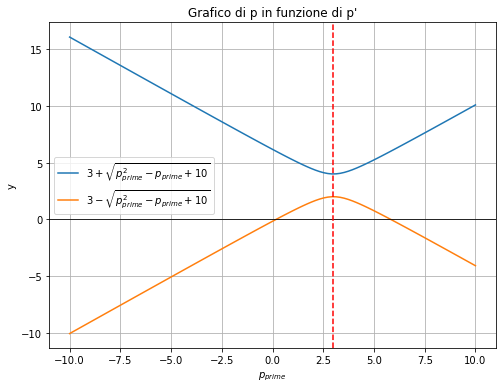

In [18]:
import numpy as np
import matplotlib.pyplot as plt

p_prime = np.linspace(-10, 10, 100)
y_plus = 3 + np.sqrt(p_prime**2 - 6*p_prime + 10)
y_minus = 3 - np.sqrt(p_prime**2 - 6*p_prime + 10)

plt.figure(figsize=(8, 6))
plt.plot(p_prime, y_plus, label=r'$3 + \sqrt{p_{prime}^2 - p_{prime} + 10}$')
plt.plot(p_prime, y_minus, label=r'$3 - \sqrt{p_{prime}^2 - p_{prime} + 10}$')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=3, color='red', linestyle='--', linewidth=1.5)
plt.xlabel('$p_{prime}$')
plt.ylabel('y')
plt.title("Grafico di p in funzione di p'")
plt.legend()
plt.grid(True)

plt.show()


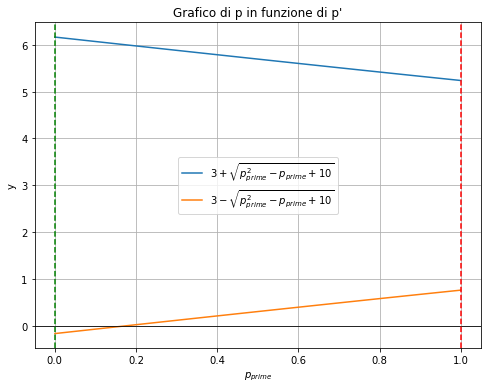

In [19]:
p_prime = np.linspace(0, 1, 100)
y_plus = 3 + np.sqrt(p_prime**2 - 6*p_prime + 10)
y_minus = 3 - np.sqrt(p_prime**2 - 6*p_prime + 10)

plt.figure(figsize=(8, 6))
plt.plot(p_prime, y_plus, label=r'$3 + \sqrt{p_{prime}^2 - p_{prime} + 10}$')
plt.plot(p_prime, y_minus, label=r'$3 - \sqrt{p_{prime}^2 - p_{prime} + 10}$')
plt.axhline(y=0, color='black', linewidth=0.8)
plt.axvline(x=1, color='red', linestyle='--', linewidth=1.5)
plt.axvline(x=0, color='green', linestyle='--', linewidth=1.5)
plt.xlabel('$p_{prime}$')
plt.ylabel('y')
plt.title("Grafico di p in funzione di p'")
plt.legend()
plt.grid(True)

plt.show()


### Distribuzione Beta

Sia la funzione $GFT(p, p', S, B)$ definita come:

$$
GFT(p, p', S, B) = (b - p' + p - s) * 1{b ≤ p' ≤ p ≤ s}
$$


In generale, per una distribuzione beta con parametri $\alpha$ e $\beta$, la funzione di densità è data da:

$$[f(x; \alpha, \beta) = \frac{x^{\alpha-1} \cdot (1 - x)^{\beta-1}}{B(\alpha, \beta)}]$$

Dove ${B(\alpha, \beta)}$ è la funzione beta (di Eulero), utilizzata come fattore di normalizzazione per rendere l'integrale della funzione di densità pari a 1, pari a:

$$
B(\alpha, \beta) = \int_{0}^{1} t^{\alpha - 1} (1 - t)^{\beta - 1} \, dt
$$

Se $S$ e $B$ sono distribuite secondo una distribuzione beta con parametri $\alpha_S$ e $\beta_S$ e $\alpha_B$ e $\beta_B$ rispettivamente, possiamo scrivere la funzione di densità di $S$ come $f_S(s) = \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)}$ e la funzione di densità di $B$ come $f_B(b) = \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)}$.

Possiamo scrivere il valore atteso di $\mathbb E[GFT(p, p', S, B)]$ considerando S e B come due distribuzioni beta come:

$$
\mathbb{E}[GFT(p, p', S, B)] =\int_{0}^{p'} \left( \int_{p}^{1} (b - p' + p - s) \right) \, \cdot f_S(s) \cdot f_B(b) \, db \cdot ds
$$

**1. Calcolo dell'integrale :**

$$
\int_{0}^{p'}  \int_{p}^{1} (b - p' + p - s) \,\cdot \frac{s^{\alpha_S - 1} \cdot (1 - s)^{\beta_S - 1}}{B(\alpha_S, \beta_S)} \cdot \frac{b^{\alpha_B - 1} \cdot (1 - b)^{\beta_B - 1}}{B(\alpha_B, \beta_B)} \, ds \cdot db \\
$$


A questo punto:

* se $p = p'$, torniamo alla situazione di due distribuzioni Beta in FBP
* altrimenti è necessario calcolare l'integrale computazionalmente

In [20]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import dblquad


def expected_value_SBI_beta(alpha_S, beta_S ,alpha_B, beta_B , p, p_prime, T ):
    #La funzione integrand calcola il valore della funzione integranda al punto 
    #(b,s) in base ai parametri delle distribuzioni.
    def integrand(b, s, alpha_S, beta_S, alpha_B, beta_B):
        return (b - p + p_prime - s) * beta.pdf(s, alpha_S, beta_S) * beta.pdf(b, alpha_B, beta_B)


    #calcola valore atteso
    #funzione dblquad: utilizzata per calcolare l'integrale doppio di una funzione in un certo intervallo.

    def calculate_expected_value(p, p_prime, alpha_S, beta_S, alpha_B, beta_B):
        # Definizione dei limiti di integrazione
        inner_lower_limit = p #limite inferiore integrale interno
        inner_upper_limit = 1 #limite superiore integrale interno
        
        outer_lower_limit = 0 #limite inferiore integrale esterno
        outer_upper_limit = p_prime #limite superiore integrale esterno

        # Argomenti per la funzione integrand
        args_integrand = (alpha_S, beta_S, alpha_B, beta_B)

        # Calcolo dell'integrale doppio
        result, _ = dblquad(integrand, outer_lower_limit, outer_upper_limit, inner_lower_limit, inner_upper_limit, args=args_integrand)

        # Ottenere il valore atteso
        expected_value = result

        # Restituire il valore atteso moltiplicato per T
        return expected_value * T


    #ottieni valore atteso
    expected_value = calculate_expected_value(p, p_prime, alpha_S, beta_S, alpha_B, beta_B)
    #restituiamo valore atteso GIA MOLTIPLICATO PER T
    return expected_value

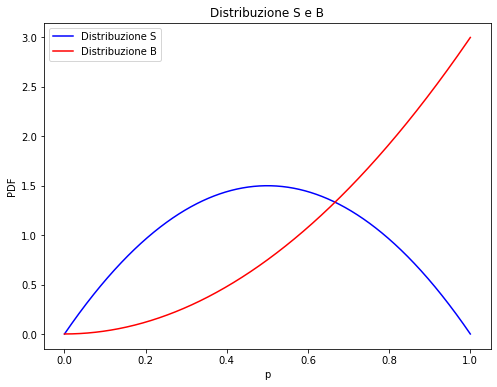

Valore Atteso: 57.131795


In [21]:
import numpy as np
from scipy.stats import beta
from scipy.integrate import dblquad
import matplotlib.pyplot as plt

# Parametri per le distribuzioni beta S e B
alpha_S = 2
beta_S = 2
alpha_B = 3
beta_B = 1

# valori per p, p_prime, e T
p = 0.3
p_prime = 0.7
T = 100

# calcola valore atteso
result = expected_value_SBI_beta(alpha_S, beta_S, alpha_B, beta_B, p, p_prime, T)

# Comincia Grafico
x = np.linspace(0, 1, 1000)
plt.figure(figsize=(8, 6))

# distribuzione S
plt.plot(x, beta.pdf(x, alpha_S, beta_S), label='Distribuzione S', color='blue')

# distribuzione B
plt.plot(x, beta.pdf(x, alpha_B, beta_B), label='Distribuzione B', color='red')

plt.title('Distribuzione S e B')
plt.xlabel('p')
plt.ylabel('PDF')
plt.legend()

plt.show()

print("Valore Atteso:", result)


### Distribuzione Discreta Pesata

Sia la funzione $GFT(p, p', S, B)$ definita come:

$$
GFT(p, p', S, B) = (b - p' + p - s) * \mathbb I\lbrace b ≤ p' ≤ p ≤ s \rbrace
$$

Il valore atteso di $GFT(p, p', S, B)$ è dato da:

$$
\mathbb E[GFT(p, p', S, B)] = \sum_{t=1}^{T} (b - p' + p - s) * \mathbb I\lbrace b ≤ p' ≤ p ≤ s \rbrace \cdot P_S(s_t) \cdot P_B(b_t)
$$

In [22]:
# dict_weight_intervals_seller rappresenta il dizionario contenente peso_intervallo, (inizio-fine) del seller
# dict_weight_intervals_buyer rappresenta il dizionario contenente peso_intervallo, (inizio-fine) del buyer

def expected_value_SBI_discrete_uniform(T, p, p_prime, S, B, dict_weight_intervals_seller, dict_weight_intervals_buyer):
    expected_regret = 0
    
    #dato un elemento restituiamo la probabilità che questo esca
    #ovvero il peso del suo intervallo
    
    def prob_element_in_interval(dictionary, el):
        for key, value in dictionary.items():
            if el <= value:
                return key
    
    for t in range(T):
        condition_satisfied = np.logical_and(B[t] <= p_prime, p_prime <= p, p <= S[t])
        """
        The truth value of an empty array is ambiguous. 
        Returning False, but in future this will result in an error. 
        Use `array.size > 0` to check that an array is not empty.
        """
        
        if condition_satisfied.size > 0: 
            expected_regret += ((B[t] - p_prime + p - S[t]) * (1 if B[t] <= p_prime <= p <= S[t] else 0)) \
            * prob_element_in_interval(dict_weight_intervals_seller, S[t]) \
            * prob_element_in_interval(dict_weight_intervals_buyer, B[t])
                           
    expected_regret = expected_regret * T #moltiplichiamo per T
    #restituiamo il valore ottenuto
    return expected_regret



Definire l'i-esimo intervallo: 
Lower bound:  0 	Upper bound:  0.111

Definire l'i-esimo intervallo: 
Lower bound:  0.111 	Upper bound:  0.859

Definire l'i-esimo intervallo: 
Lower bound:  0.859 	Upper bound:  0.912

Definire l'i-esimo intervallo: 
Lower bound:  0.912 	Upper bound:  0.955

Definire l'i-esimo intervallo: 
Lower bound:  0.955 	Upper bound:  1

Definire l'i-esimo intervallo: 
Lower bound:  0 	Upper bound:  0.041

Definire l'i-esimo intervallo: 
Lower bound:  0.041 	Upper bound:  0.483

Definire l'i-esimo intervallo: 
Lower bound:  0.483 	Upper bound:  0.596

Definire l'i-esimo intervallo: 
Lower bound:  0.596 	Upper bound:  0.868

Definire l'i-esimo intervallo: 
Lower bound:  0.868 	Upper bound:  1.0

Definire l'i-esimo intervallo: 
Lower bound:  1.0 	Upper bound:  1.0

Definire l'i-esimo intervallo: 
Lower bound:  1.0 	Upper bound:  1.0

Definire l'i-esimo intervallo: 
Lower bound:  1.0 	Upper bound:  1
Dizionario peso-intervallo del Seller:  {257: 0.111, 29: 0.859, 5:

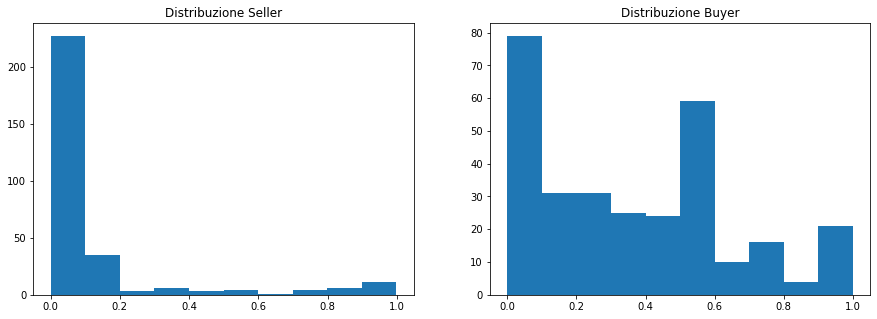

In [23]:
T = 300
num_cifre = 3

# valori per p, p_prime, e T
p = np.round(np.random.rand(0,1), 1)
p_prime = np.round(np.random.rand(0,1), 1)

S_D_tmp, S_num_of_els_in_intervals, interval_list_s  = generate_random_weighted_distribution(T, num_cifre)
B_D_tmp, B_num_of_els_in_intervals, interval_list_b  = generate_random_weighted_distribution(T, num_cifre)

S_D = np.concatenate(S_D_tmp).tolist()
B_D = np.concatenate(B_D_tmp).tolist()

dict_weight_intervals_seller = dict(zip(S_num_of_els_in_intervals, interval_list_s))
dict_weight_intervals_buyer = dict(zip(B_num_of_els_in_intervals, interval_list_b))

expected_value = expected_value_SBI_discrete_uniform(T, p,p_prime, S_D, B_D, dict_weight_intervals_seller, dict_weight_intervals_buyer)

print("Dizionario peso-intervallo del Seller: ",dict_weight_intervals_seller)
print("Dizionario peso-intervallo del Buyer: ",dict_weight_intervals_buyer)

print("Valore atteso: ", expected_value)
draw_weighted_distribution(S_D,B_D,interval_list_s,interval_list_b)